___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from ipywidgets import interact
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
# As we can see the mean and STD are not that close to each other which is a good indicator that the outliers aren't much

In [6]:
# Changing the name of these columns to make them easier to use and visualize
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'},
                   inplace=True)


In [7]:
df.shape

(200, 5)

In [8]:
df.duplicated().sum()

0

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [9]:
# Dropping

In [10]:
print(f"The shape of DataFrame BEFORE dropping CustomerID feature : rows are {df.shape[0]} and columns are {df.shape[1]}")

df.drop(columns=["CustomerID"], inplace=True)

print(f"The shape of DataFrame AFTER dropping CustomerID feature : rows are {df.shape[0]} and columns are {df.shape[1]}")




The shape of DataFrame BEFORE dropping CustomerID feature : rows are 200 and columns are 5
The shape of DataFrame AFTER dropping CustomerID feature : rows are 200 and columns are 4


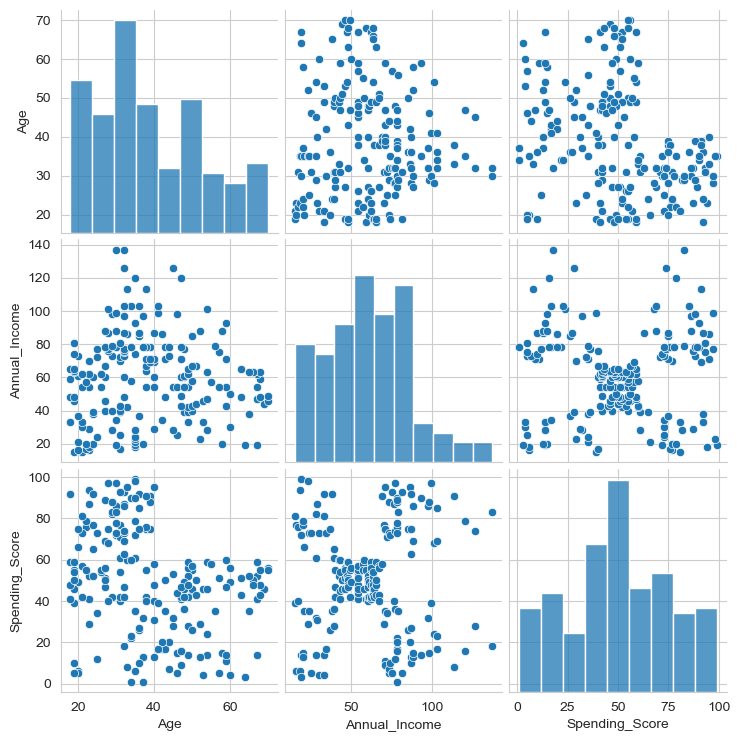

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
# It seems like we can have 5 clusters

In [13]:

@interact(col=df.columns[1:], chart=["countplot", "histogram"])
def plot(col, chart):
    colors = np.random.choice(['blue', 'pink', 'orange'])
    if chart == "countplot":
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    else:
        plt.figure(figsize=(20, 5))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

        # Notes taken from observing the plots : 
# As the histogram shows, the spending score seems to be normally distributed with a thicker tail on the right
# The annual income histogram shows that we have a few people with a really high income 
# The age histogram shows that most of our customers are below 40 which could be an important information for later analysis

interactive(children=(Dropdown(description='col', options=('Age', 'Annual_Income', 'Spending_Score'), value='A…

(-1.25, 1.25, -1.25, 1.25)

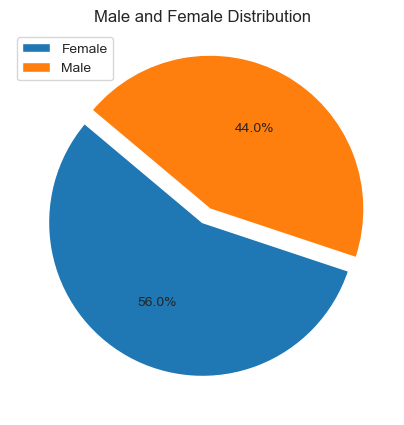

In [14]:
plt.figure(figsize=(5, 5))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=False,
        startangle=140)
plt.legend(labels=['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

# We can see here that the female customers (56%) are slightly more than the male customers (44%)

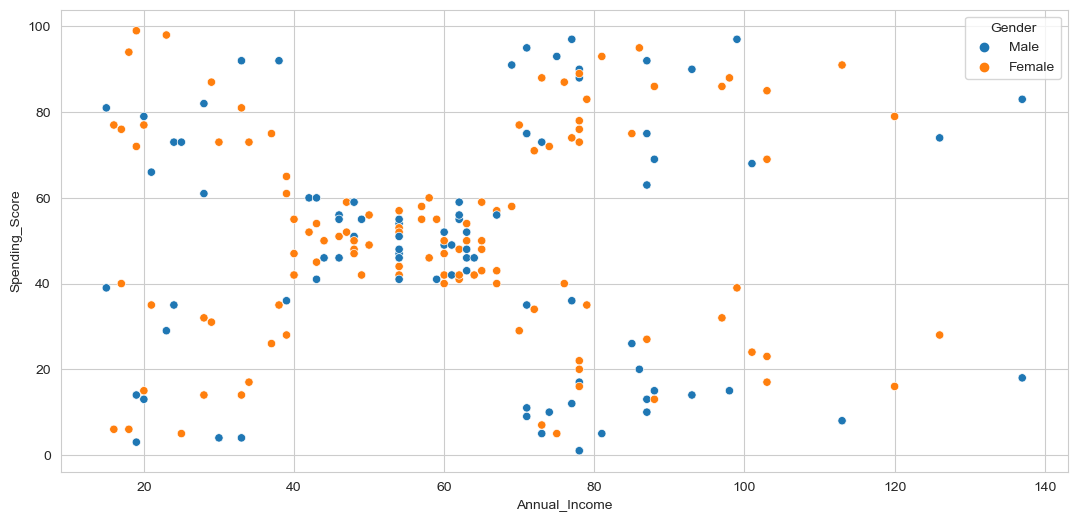

In [15]:
# As we saw above, we were able to somehow assume that we have 5 clusters, now let's take a look while specifying gender
plt.figure(figsize=(13, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue="Gender")
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [16]:
Age_SpendingScore_df = df.copy()

In [17]:
Age_SpendingScore_df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
# Dropping the columns we won't be using (Gender and Annual_Income)

Age_SpendingScore_df.drop(columns=["Gender","Annual_Income"], inplace=True)

In [19]:
Age_SpendingScore_df.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

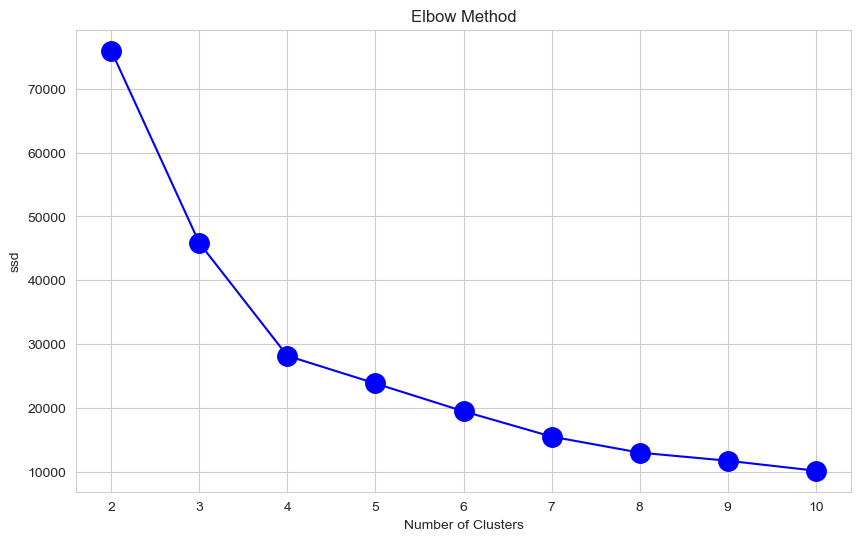

In [20]:
# Using inertia to get the elbow method used to determine the optimal no. clusters

ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(Age_SpendingScore_df)
    ssd.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()


Text(0.5, 1.0, 'elbow method')

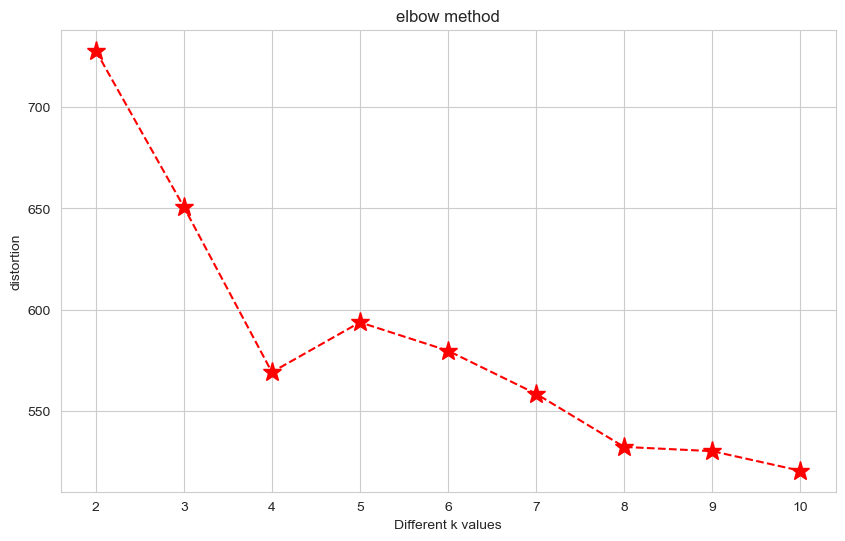

In [21]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel =  KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(Age_SpendingScore_df)
    distances = kmeanModel.transform(Age_SpendingScore_df) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [22]:
# We can see here that the optimal number from the elbow method seems to be 4
# Let's calculate the silhouette for different numbers of clusters: 

from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(Age_SpendingScore_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(Age_SpendingScore_df, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


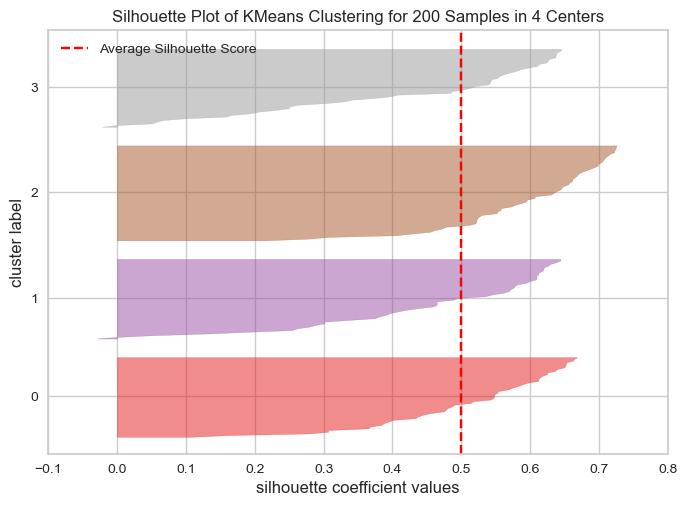

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# From visualizing the silhouette we can notice that 4 clusters seem very good 
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(Age_SpendingScore_df) 
visualizer.poof()

In [24]:
for i in range(model3.n_clusters):
    label = (model3.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


### Why silhouette_score is negative?

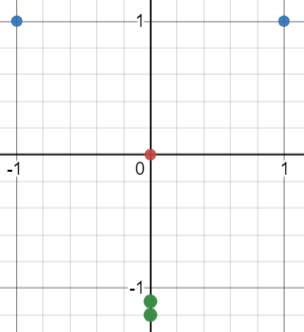

In [25]:
# Negative silhouette score indicates wrong assignment of a data point

#### *iii. Apply K Means*

In [26]:
# Now let's use the 4 clusters we decided to have in our model

KMeans = KMeans(n_clusters=4, random_state=42)



In [27]:
KMeans.fit_predict(Age_SpendingScore_df)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [28]:
df_age_sScore = Age_SpendingScore_df.copy()
df_age_sScore



,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [29]:
# Adding the cluster_KMeans as a column
df_age_sScore["cluster_KMeans"] = KMeans.fit_predict(Age_SpendingScore_df) #KMeans.labels_



In [30]:
df_age_sScore

,Age,Spending_Score,cluster_KMeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
5,22,76,2
6,35,6,1
7,23,94,2
8,64,3,1
9,30,72,2


#### *iv. Visualizing and Labeling All the Clusters*

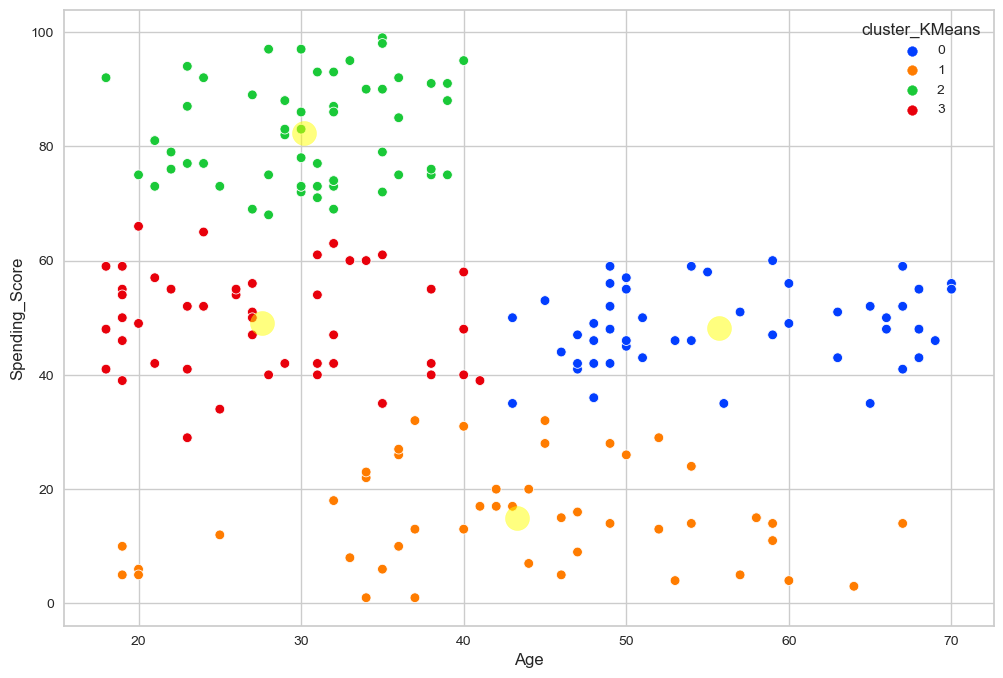

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',
                 hue='cluster_KMeans',
                y='Spending_Score',
               data=df_age_sScore,
                palette="bright")
centers = KMeans.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='yellow',
            s=300,
            alpha=0.5)

# We can see here that the spending score gets less as you observe older people which is reasonable 
# The business decisions would vary for different clusters depending on the goal of the analysis

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [32]:
AnnI_sScore_df = df[['Annual_Income','Spending_Score']]
AnnI_sScore_df.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

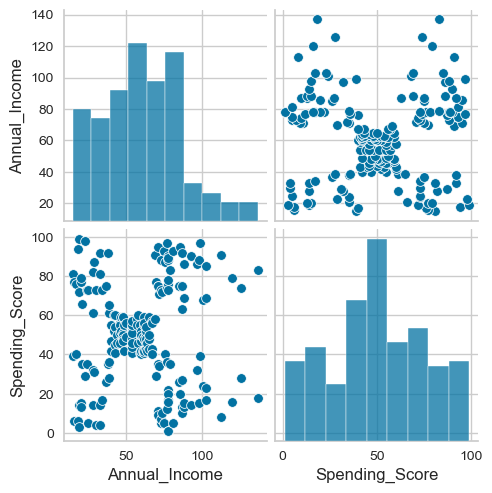

In [33]:
sns.pairplot(AnnI_sScore_df)
# We can see here that we have the 5 clusters we assumed previously

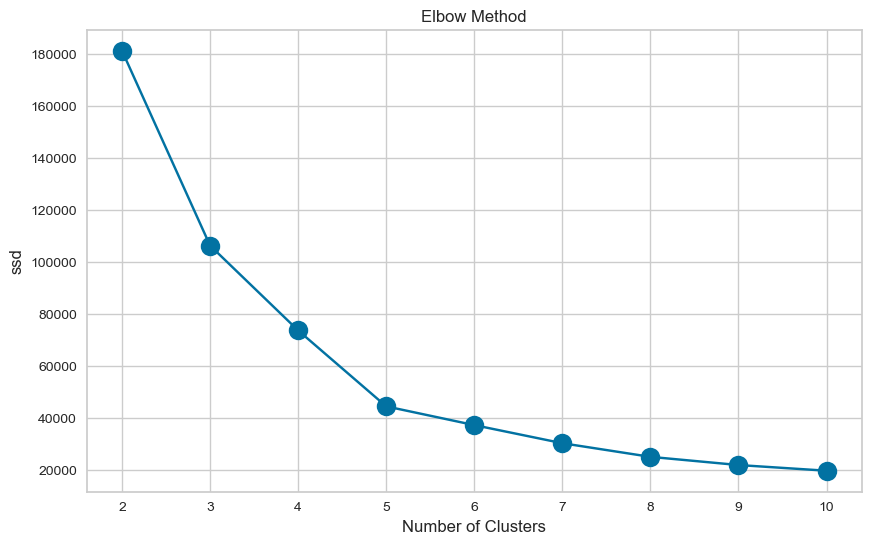

In [34]:
from sklearn.cluster import KMeans
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(AnnI_sScore_df)
    ssd.append(kmeans.inertia_)  
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()


Text(0.5, 1.0, 'elbow method')

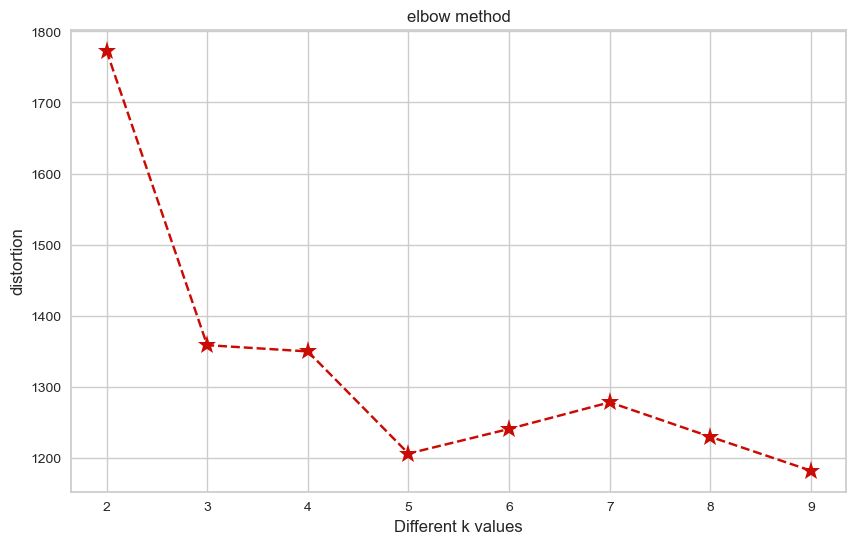

In [35]:
from sklearn.cluster import KMeans
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(AnnI_sScore_df)
    distances = kmeanModel.transform(AnnI_sScore_df) 
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result)) 

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [37]:
# The error here is very strange and sometimes it goes away when I import the KMeans again
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    
    KMeans = KMeans(n_clusters=num_clusters, random_state=42)
    KMeans.fit(AnnI_sScore_df)
    cluster_labels = KMeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(AnnI_sScore_df, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.2968969162503008


TypeError: 'KMeans' object is not callable

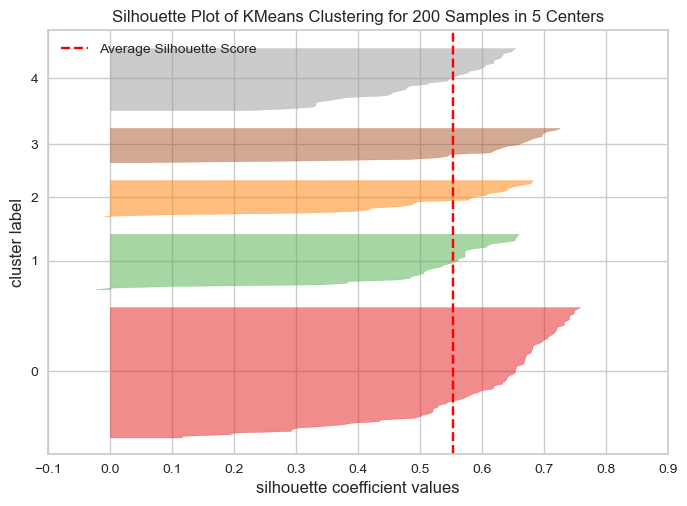

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
from sklearn.cluster import KMeans
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(AnnI_sScore_df)  
visualizer.poof()

In [39]:
# Again we are calculating the silhouette for each number of clusters

for i in range(model4.n_clusters):
    label = (model4.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5039873487056818
mean silhouette score for label 2    : 0.5122676140736505
mean silhouette score for label 3    : 0.5990128687006722
mean silhouette score for label 4    : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [40]:
KMeans2 = KMeans(n_clusters=5, random_state=42)
KMeans2.fit_predict(AnnI_sScore_df)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [41]:
df_AnnI_sScore = AnnI_sScore_df.copy()
df_AnnI_sScore.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [42]:
df_AnnI_sScore['cluster_KMeans'] = KMeans2.fit_predict(AnnI_sScore_df)
df_AnnI_sScore

,Annual_Income,Spending_Score,cluster_KMeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
5,17,76,3
6,18,6,2
7,18,94,3
8,19,3,2
9,19,72,3


#### *iv. Visualizing and Labeling All the Clusters*

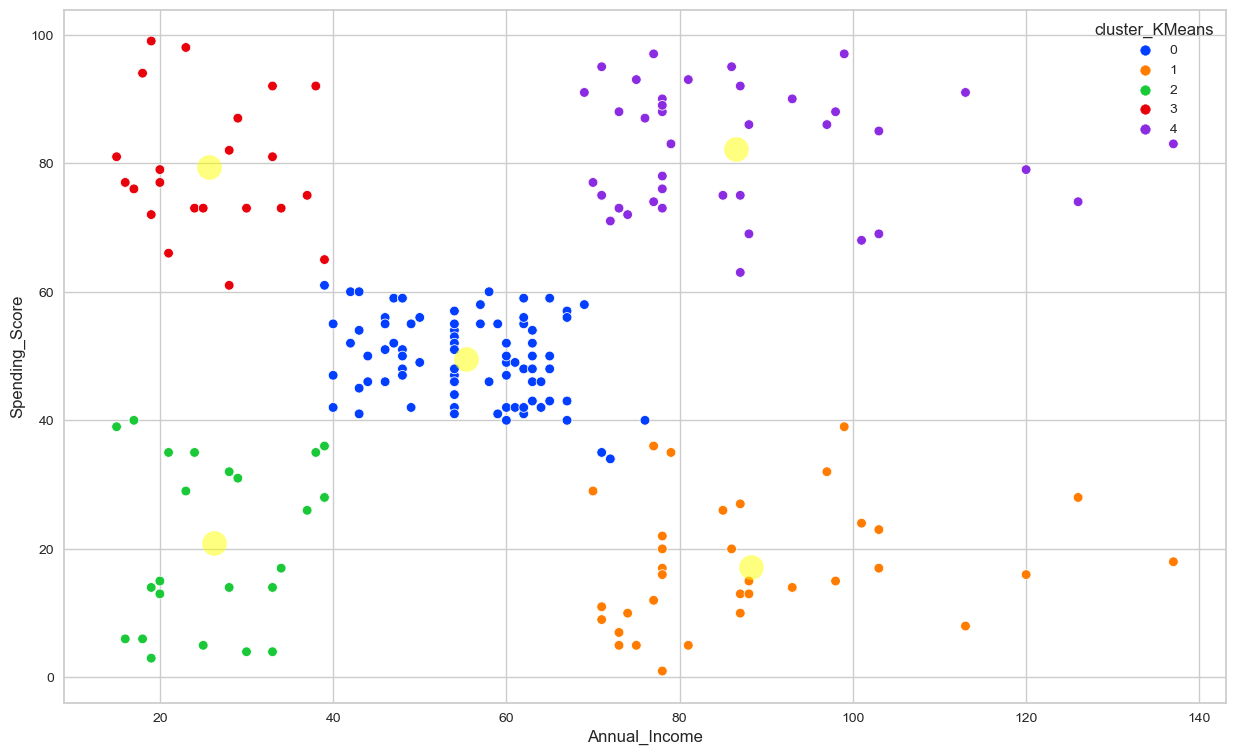

In [43]:
# As we assumed from the start (EDA part) there are 5 clusters or we can say 5 is the perfect number for dividing these data points

plt.figure(figsize=(15, 9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_KMeans',
                data=df_AnnI_sScore,
                palette="bright")
centers = KMeans2.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='yellow',
            s=300,
            alpha=0.5)



### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [44]:
Age_SpendingScore_df

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [45]:
# Constructing a dendrogram requires a linkage 
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [47]:
# Here we can see the different dendrograms for each type of linkage
# We can see in ward that the smaller clusters aren't really showing

@interact(method=[ "single" ,"ward", "complete", "average"])
def dendogramer(method):
    link = linkage(y=Age_SpendingScore_df, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=14)

interactive(children=(Dropdown(description='method', options=('single', 'ward', 'complete', 'average'), value=…

In [48]:
# Let's calculate the silhouette score 
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise KMeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(Age_SpendingScore_df)
    cluster_labels = Agg_model.labels_
    silhouette_avg = silhouette_score(Age_SpendingScore_df, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## Clustering based on Annual Income and Spending Score- x2

In [49]:
AnnI_sScore_df

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [50]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=AnnI_sScore_df, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

In [51]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(AnnI_sScore_df)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(AnnI_sScore_df, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [52]:
Age_SpendingScore_df

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [53]:
# Since we are using Ward for linkage the Euclidean distance must be used
Agg1 = AgglomerativeClustering(
    n_clusters=4,
    metric=
    'euclidean', 
    linkage='ward') 
y_agg = Agg1.fit_predict(Age_SpendingScore_df)

In [54]:
df_age_sScore

,Age,Spending_Score,cluster_KMeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
5,22,76,2
6,35,6,1
7,23,94,2
8,64,3,1
9,30,72,2


In [55]:
df_age_sScore['cluster_Agg'] = y_agg
df_age_sScore.head()

,Age,Spending_Score,cluster_KMeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [56]:
AnnI_sScore_df

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [57]:
Agglo = AgglomerativeClustering(n_clusters=5,
                               metric='euclidean',
                               linkage='ward')
y_Agglo = Agglo.fit_predict(AnnI_sScore_df)

In [58]:
df_AnnI_sScore

,Annual_Income,Spending_Score,cluster_KMeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
5,17,76,3
6,18,6,2
7,18,94,3
8,19,3,2
9,19,72,3


In [59]:
df_AnnI_sScore['cluster_Agg'] = y_Agglo
df_AnnI_sScore.head()

,Annual_Income,Spending_Score,cluster_KMeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

In [60]:
df_age_sScore

,Age,Spending_Score,cluster_KMeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
5,22,76,2,3
6,35,6,1,2
7,23,94,2,3
8,64,3,1,2
9,30,72,2,3


<Axes: xlabel='Age', ylabel='Spending_Score'>

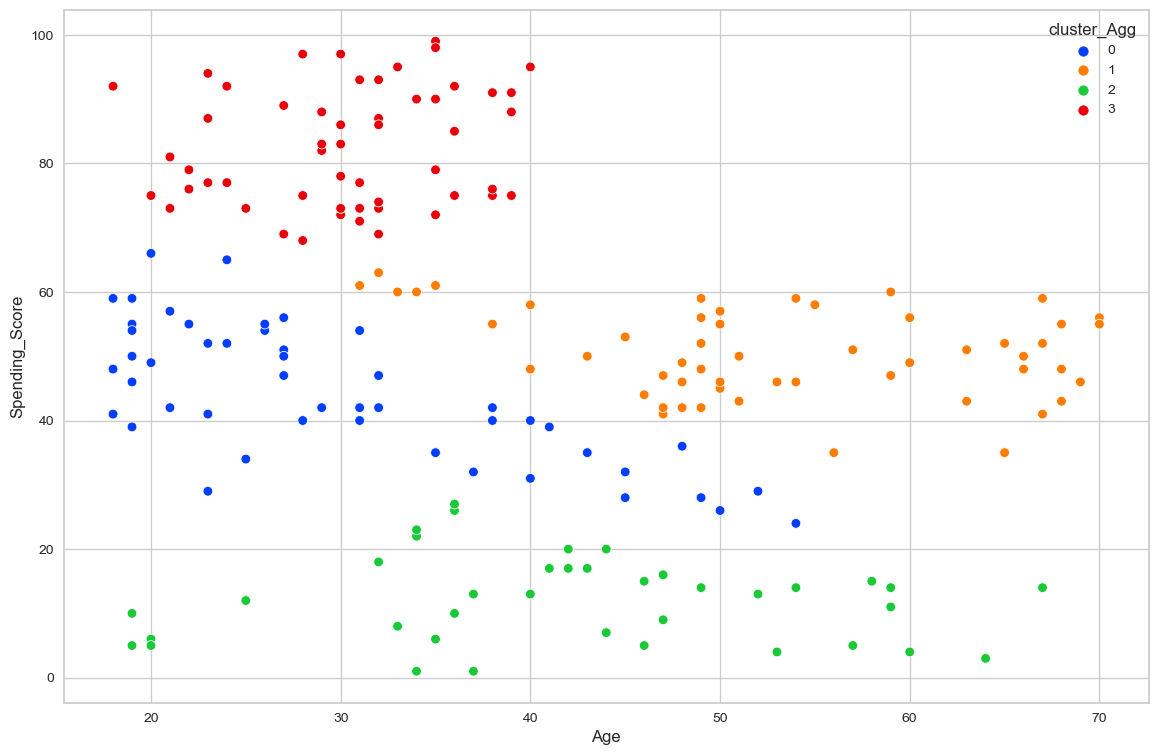

In [61]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age_sScore,
                palette="bright")

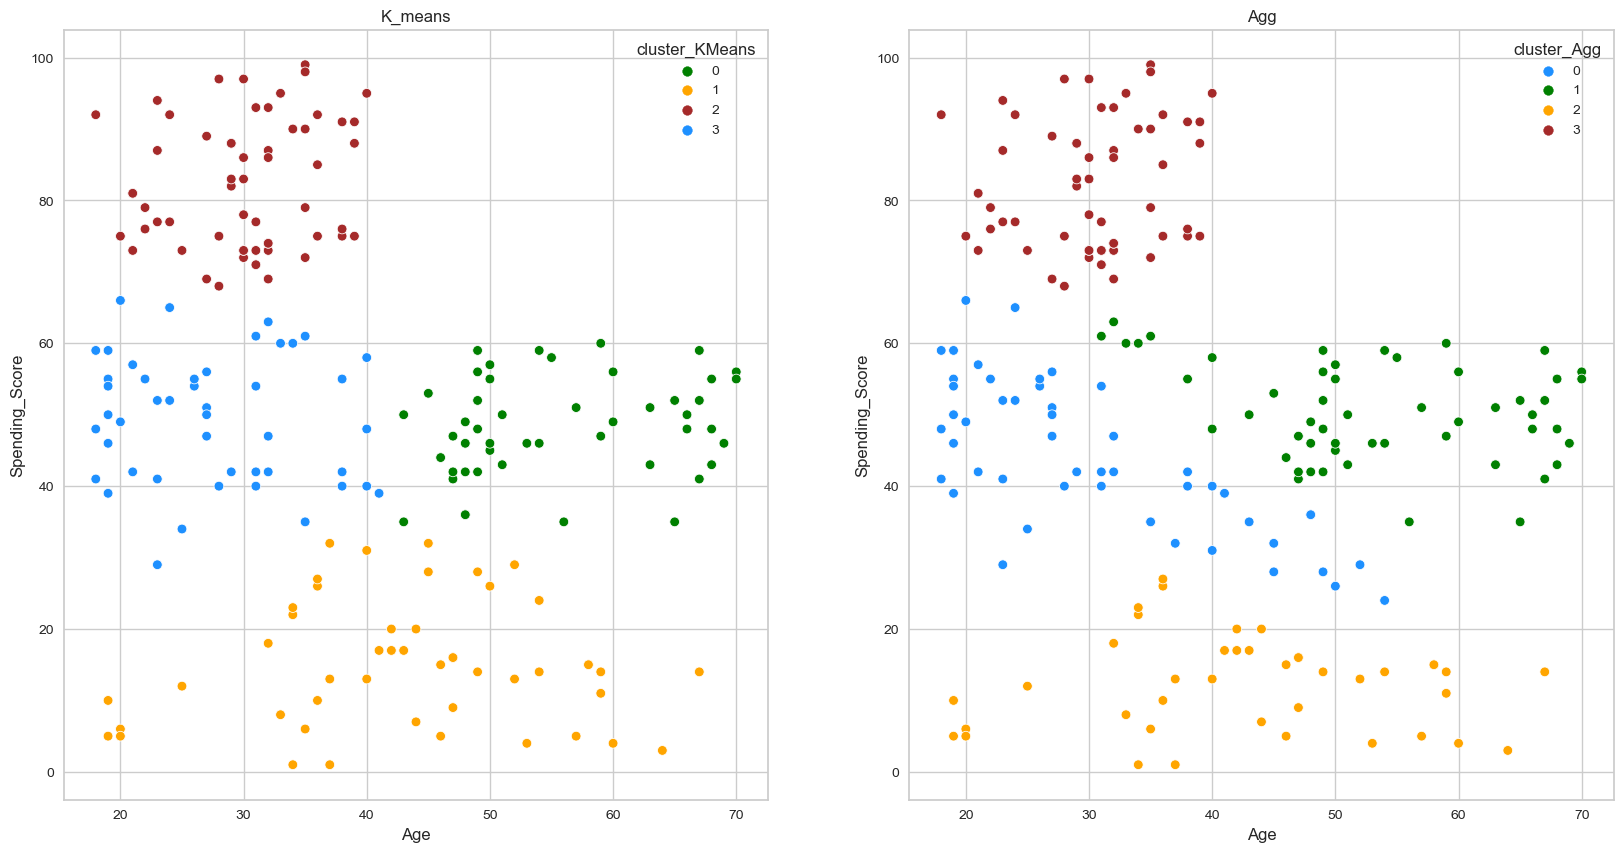

In [62]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_KMeans',
                data=df_age_sScore,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_age_sScore,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

In [63]:
# It seems like the K_means represents the clusters more separately, which makes since because it uses vertical and horizontal lines to separate the clusters
# We can see here that the hierarchical clustering is not really dividing the clusters in a similar way to the K means as it allows what it looks like an opverlapping but isn't

#### Annual Income and Spending Score- x2

In [64]:
df_AnnI_sScore

,Annual_Income,Spending_Score,cluster_KMeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
5,17,76,3,3
6,18,6,2,4
7,18,94,3,3
8,19,3,2,4
9,19,72,3,3


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

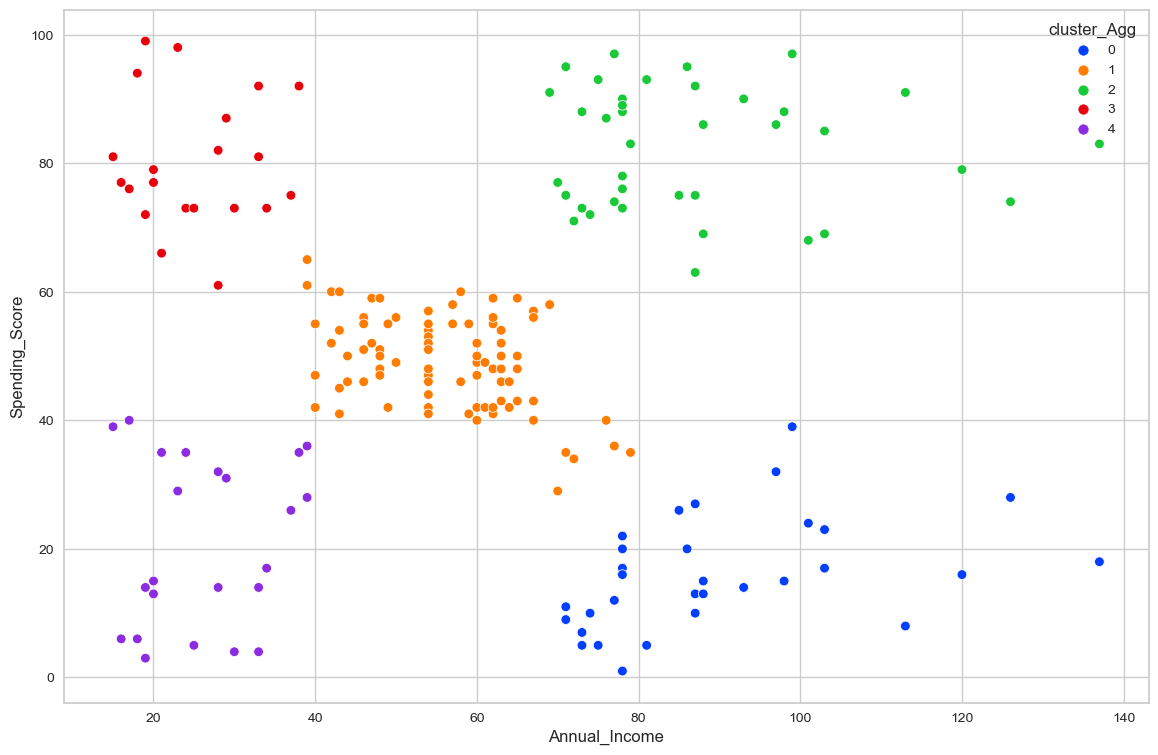

In [65]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_AnnI_sScore ,
                palette="bright")

Text(0.5, 1.0, 'Agg')

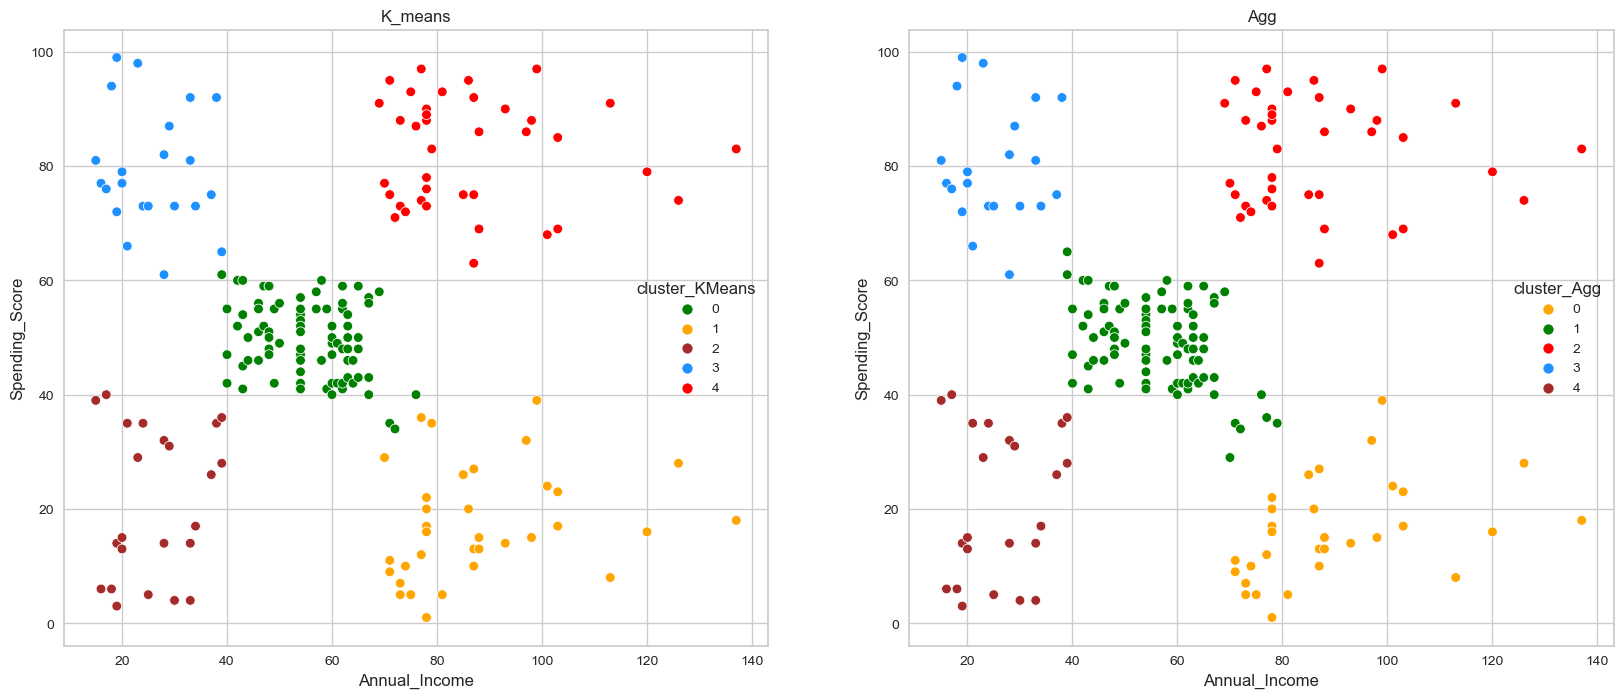

In [66]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_KMeans',
                data=df_AnnI_sScore,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_AnnI_sScore,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

In [67]:
# K means seems to separate the clusters in a better manner and therefore it is better to choose it over the hierarical clustering

#### Interpretation based on Age and Spending Score- x1

In [68]:
df_age_sScore

,Age,Spending_Score,cluster_KMeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
5,22,76,2,3
6,35,6,1,2
7,23,94,2,3
8,64,3,1,2
9,30,72,2,3


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

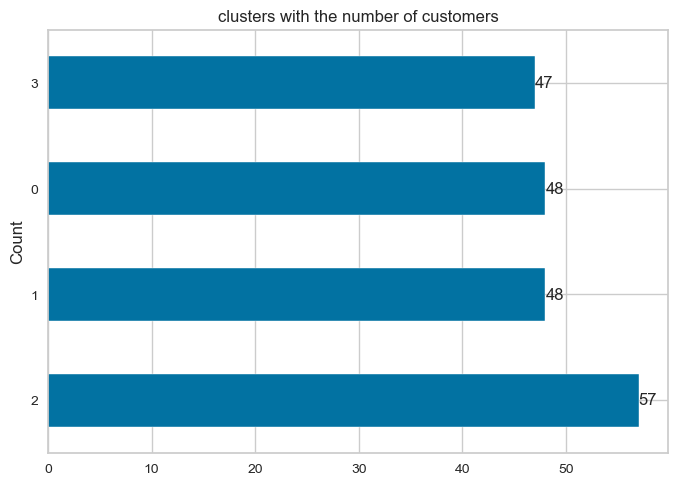

In [69]:
# We can see the number of people in each cluster and it looks like the 2nd has the most
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age_sScore.cluster_KMeans.value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])

In [70]:
df["cluster_Age_Spending_Score"] = df_age_sScore.cluster_KMeans
df.head()

# We add clusters resulting from KMeans to our df (age-spending score)

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


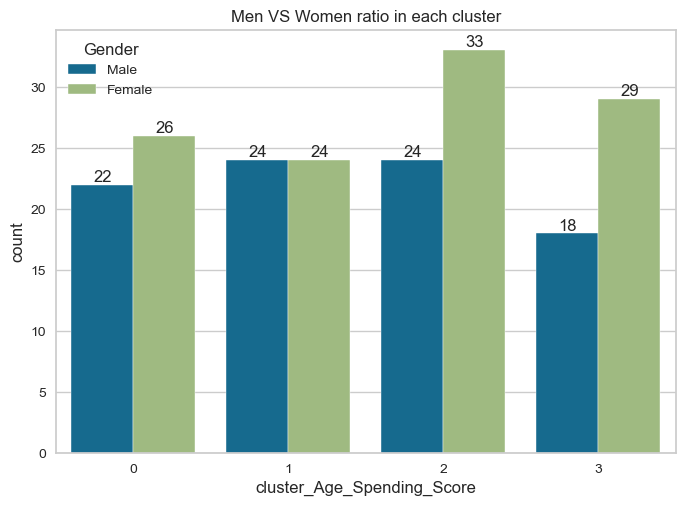

In [71]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

# Women in the 2nd and 3rd clusters seem to be a bit dominating 

In [72]:
df.drop(columns = 'Gender').groupby("cluster_Age_Spending_Score").mean()
# We group them according to the clusters formed.

,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


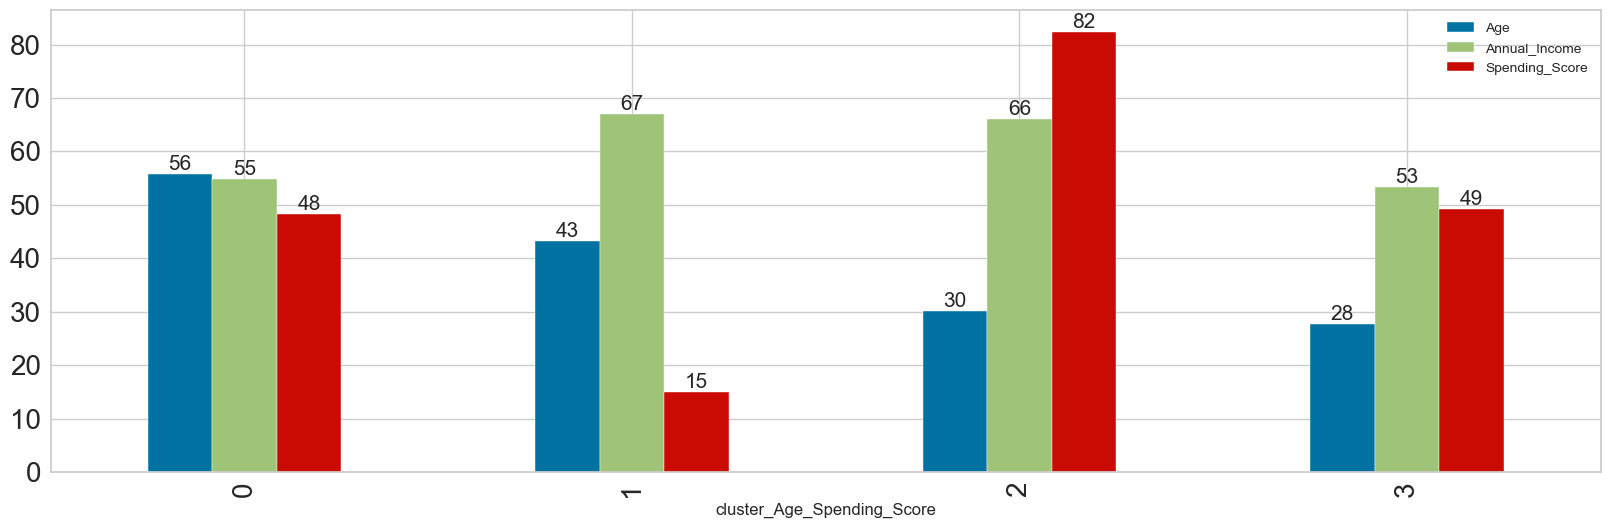

In [73]:
ax = df.drop(columns = 'Gender').groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

# Note that we are using df.groupby("cluster_Age_Spending_Score").mean().

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending. 

- For this group we can give them some bundles or provide offers where they spend a bit more to get free samples and so

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

- For this group we should look more into what kind of products they are interested in and try to offer them more so they can spend more


**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it. 

- This group can be added to special memberships to keep them loyal    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

- This groups falls into the ages of 28 and under, offers on products that concern this age groups will make them spend more

#### Interpretation based on Annual Income and Spending Score- x2

In [74]:
df_AnnI_sScore

,Annual_Income,Spending_Score,cluster_KMeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
5,17,76,3,3
6,18,6,2,4
7,18,94,3,3
8,19,3,2,4
9,19,72,3,3


In [75]:
df_AnnI_sScore.cluster_KMeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_KMeans, dtype: int64

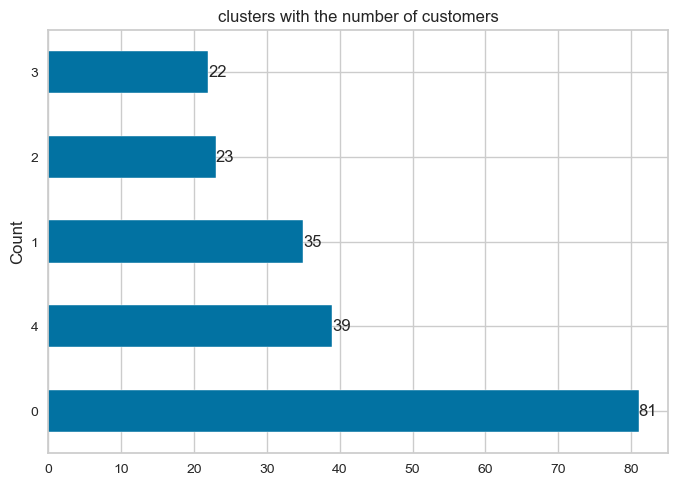

In [76]:
# We can see the number of people in each cluster and it looks like 0 has the most
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_AnnI_sScore.cluster_KMeans.value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0]);

In [77]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [78]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [79]:
# Using our own measure
df["cluster_Annual_Income_Spending_Score"] = df_AnnI_sScore.cluster_KMeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


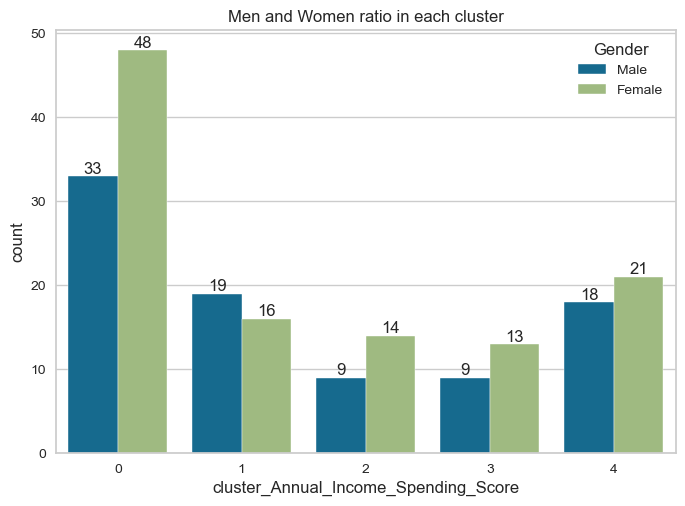

In [80]:
plt.title("Men and Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

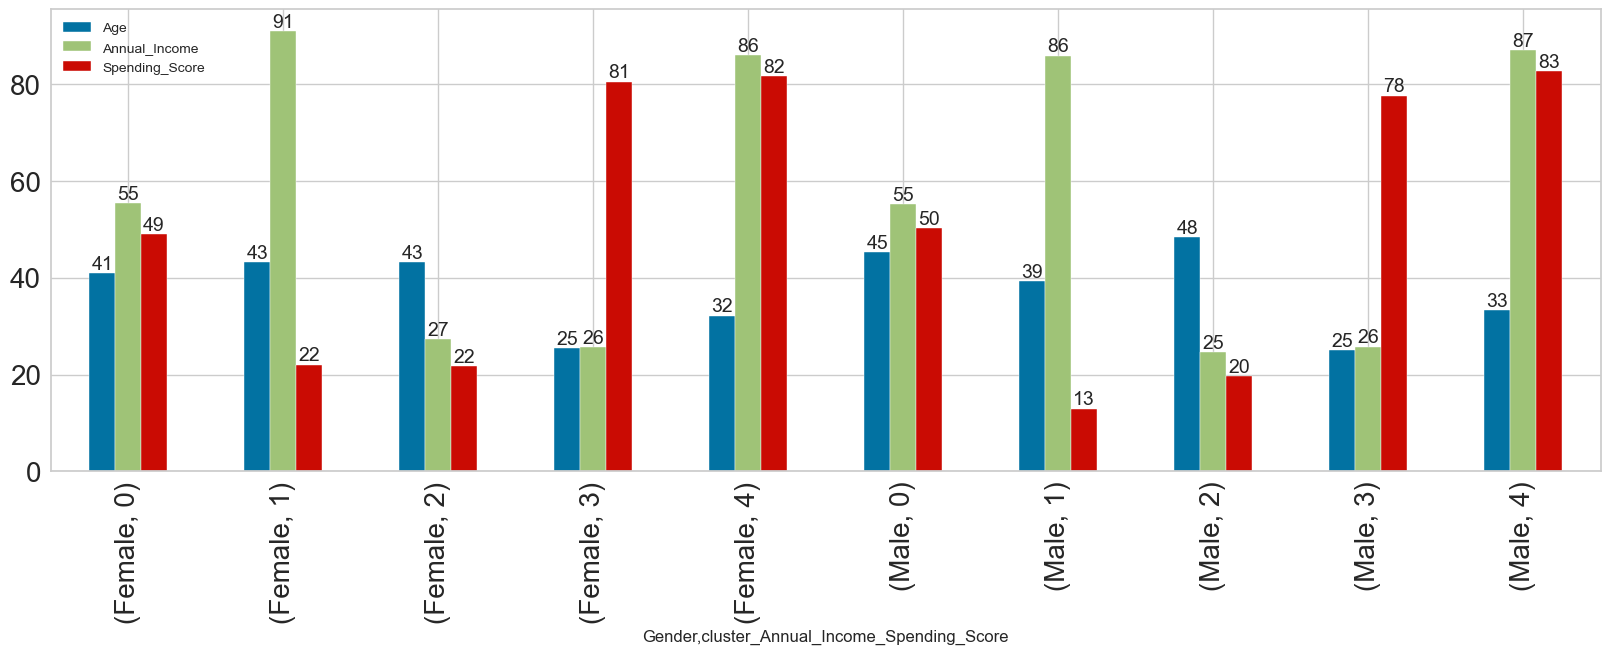

In [81]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

- The decision can be either making more offers or finding the products that are interesting for women in that age group which could vary but surveys can help

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.  

- Usually around that age people in general won't spend much money on short-term products, so it is good to provide hight quality long-term useful products and also some hobbies equipment 

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

- Bundles are also a good option to offer this group since a bundle means having more products with less money (or at least that's what they say) since they are limited in income

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

- This group needs help, we can offer some customer guidance where they learn how to spend wisely 

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

- This group should be given special memberships, some exclusive offers as well

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

- Products of interest for males can have some offers, special discounts (Multiple products) on hobbies equipment (yes including video games)

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.  

- This group is a bit tough as they don't enjoy spending much, but you can get them interested if you offer good quality products and multiple products in one place

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

- Offers with bundles are perfect for this group

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

- This group needs help, we can offer some customer guidance where they learn how to spend wisely 

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

- This group should be given special memberships, some exclusive offers as well

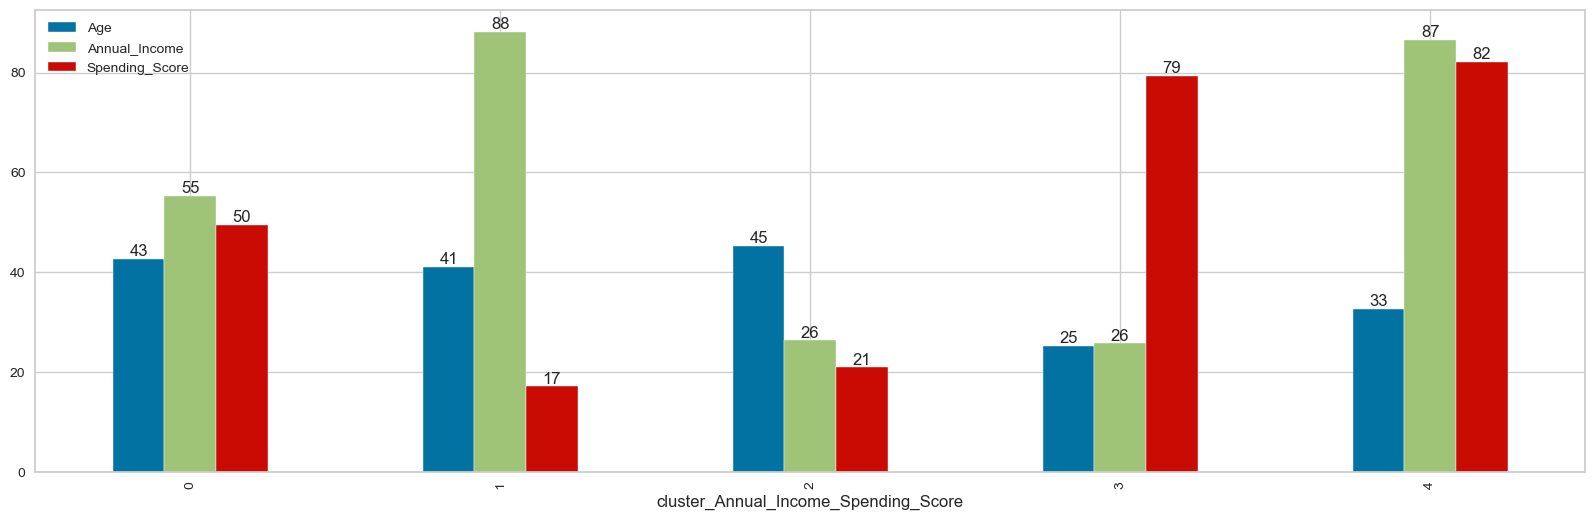

In [82]:
ax = df.drop(columns = 'Gender').groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___